In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Investigation of SoftMax function with example.
author : Daodeiv (David Stankov)

<h7>
        <font color='#263a61' > The softmax is a function that takes as input a vector with K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying the softmax function, some vector components could be negative, or greater than one and might not sum to one. Futhermore, the larger input components corresponds to larger  probabilities. The softmax function is often used in neural networks to map non normalized output of the network to a probability distribution over predicted output classes.
        <br>
        
             
    
   </font>
</h7>    

<h7>
    <font color='#454214' >
        The standart softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $ is defined by formula : <br>
    

   </font>    
</h7>
<h2><font color='#1c5cd9' > $$\sigma(z)_i= \frac{e^z_i}{\sum_{j=1}^n e^{z}_{j}}$$  
     </font> 
</h2>
<h7>
    <font color='#263a61' >Before getting deeper into the above equation, we gonna generate our learning data. The data consist of records contains a different type of vehicles and their sizes. The dataset is very simple and we would be able to predict from the size, what vehicle is, but in the beginning, our purpose is not to make a prediction the purpose is diving into the basic concepts behind softmax.
    
   </font>
</h7>  

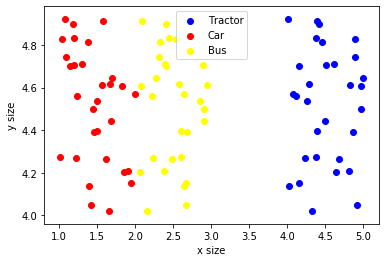

In [147]:
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+4,columns = ['x_size','y_size','z_size'])
plt.scatter(tractor_dataframe['x_size'],tractor_dataframe['y_size'],label='Tractor',color='blue')
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
plt.scatter(car_dataframe['x_size'],tractor_dataframe['y_size'],label='Car',color='red')
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
plt.scatter(bus_dataframe['x_size'],tractor_dataframe['y_size'],label='Bus',color='yellow')
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)
plt.xlabel('x size')
plt.ylabel('y size')
plt.legend()


data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(data) 

In [4]:
data

,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,4.018739,4.081280,4.945429,0,0,1
1,4.089081,4.959956,4.091043,0,0,1
2,4.636914,4.308745,4.300109,0,0,1
3,4.464787,4.828882,4.774260,0,0,1
4,4.386441,4.999404,4.073386,0,0,1
...,...,...,...,...,...,...
25,1.039236,1.387498,1.912427,0,1,0
26,1.867626,1.915900,1.681023,0,1,0
27,1.348552,1.763558,1.319645,0,1,0
28,1.791843,1.038881,1.201212,0,1,0


<h7>
    <br>
        <font color='#263a61' >
The Label_car,label_bus, and label_tractor contain dummies values, which are categorical values transformed into convenient form in order to perform mathematical operations over them.
   <br><br>
   First, let separate the data into X data and Y(categorical data).         
   </font>
    
</h7>                

In [7]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1))
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']])
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) 

In [11]:
print('firsts 10 elements of X: ')
print(X_train[1:10])
print('firsts 10 elements of Y: ')
print(y_train[1:10])

firsts 10 elements of X: 
[[1.93804015 1.99986983 1.41626215]
 [4.78199999 4.5278506  4.12819031]
 [2.142378   2.00865232 2.27417099]
 [2.15536029 2.26510682 2.67617828]
 [4.57836866 4.6488343  4.58232809]
 [2.02076404 2.84216718 2.91191727]
 [2.36593315 2.14379695 2.49463099]
 [4.9801253  4.37838206 4.96595237]
 [1.93171614 1.26317027 1.82852311]]
firsts 10 elements of Y: 
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


<h7>
    <br>
        <font color='#263a61' > Our main purpose is to perform softmax function into $X$ values ant to get matrix(table) $I'$ which is approximately similar to $Y'$ as much as possible.In order to do that, we have to choose a matrix $Z$ consist of vectors $\vec Z_i$ $i \in [1,2,..,n]$ where  $n$ is number of categorical variables with $m$ components correspond to every column of the dataset , the components are also called predictors or features. Over this matrix $Z$ we have to apply softmax function. Our above dataset has a three categorical variable and three non-categorical(feature) variables , therefore we have to have matrix $Z_{(n,m+1)}=Z_{(3,4)}$ <br> <br>
   The matrix $Z$ looks like this : <br> 
        </font> 
        <br>
        <font color='#1c5cd9'>
    $$ Z = \begin{bmatrix} \vec z_1 \\  \vec z_2\  \\ \vec z_3  \end{bmatrix} =\begin{bmatrix} z_{11} & z_{12} & z_{13} & b_{10} \\ z_{21} & z_{22} & z_{23} & b_{20}\\ z_{31} & z_{32} & z_{33} & b_{30} \end{bmatrix}  $$ <br> 
        </font>       
        <br> <br>
        <font color='#263a61' > 
         Where acording to  our dataset $z_1$ corresponds to label bus, $z_1$ to label car , $z_3$ to label tractor.
        <br>
 If a get a dot product $K=<X|Z>+Z_0$ wich is a just matrix mutiplication : 
        </font> 
        <br> <br>
        <font color='#1c5cd9'>
        $$ W = K = X.Z^T =  \begin{bmatrix} x_{11} &  x_{12} & x_{13} & 1 \\  x_{21} &  x_{32} & x_{33} & 1 \\ ... & ... & ...& ...  \\ x_{p1} &  x_{p2} & x_{p3} & 1  \end{bmatrix} * \begin{bmatrix} z_{11} & z_{21} & z_{31}  \\ z_{12} & z_{22} & z_{32} \\  z_{13} & z_{23} & z_{33}  \\z_{10} & z_{20} & z_{30}\end{bmatrix}  =   \begin{bmatrix} k_{11} &  k_{12} & k_{13} \\  k_{21} &  k_{32} & k_{33} \\ ... & ... & ...  \\ k_{p1} &  k_{p2} & k_{p3}  \end{bmatrix} $$ <br> 
   </font> 
   <br>
        <font color='#263a61' >
        The next step is applying the softmax function over matrix K, we will call that operation the inner softmax product, wich is the core softmax concept.
    </font> 
        <br> <br>
        <font color='#1c5cd9'>
        $$<Soft|K> = P(|k)= \begin{bmatrix} \frac{e^{k_{11}}}{\sum_{1j}e^{k_{1j}}} & \frac{e^{k_{12}}}{\sum_{1j}e^{k_{1j}}} & \frac{e^{k_{13}}}{\sum_{1j}e^{k_{1j}}}\\   \\ ... & ... & ...  \\  \\    \frac{e^{k_{p1}}}{\sum_{pj}e^{k_{pj}}} & \frac{e^{k_{p2}}}{\sum_{pj}e^{k_{pj}}} & \frac{e^{k_{p3}}}{\sum_{pj}e^{k_{pj}}}\end{bmatrix} $$ 
  </font> 
   <br> <br>
        <font color='#263a61' >
        The elements of $P$ we will called predictors $p_{ij}$ wich can be interpreated as probability i_th row elemenet
        to be j_th categorical variable.If $p_{1,2}$ means what is the probability of record one belongs to the label_ bus?
        Ofcourse, $p_{ij} \in [0,1]$ <br>
        Another way to express $p_{ij}$ : <br>  
        </font> 
        <br> <br>
      
  </font>    
</h7>    

<h2>
      <font color='#1c5cd9'>
        $$(3) \; \;p_{ij} = \frac{ e^{ ^{k_{ij}} } }{ \sum_p^3 e^{k_{ip}}}
        =\frac{ e^{ ^{\sum_v^3 x_{iv}.z_{jv} }} }{ \sum_p^3 e^{ ^ {\sum_v^3 x_{iv}.z_{jv}}}} $$
     </font>
</h2>      


<h4>
    <br>
        <font color='#263a61' >
        How we can interpret the eq.(3) from probability viewpoint. If we want to find what is the probability record 2 from our dataset to be Tractor. The tractor label corresponds to $\vec Z_3$ estimator therefore, according to the eq.(3) the probability matematicaly looks like this.
    </font>
     <br>
     <br>
 </h4>
 <h2>
     <font color='#1c5cd9'>
         $$P(y=j|X_2) = P(y=3|X_2)=P_{23} = \frac{ e^{ ^{k_{23}} } }{ \sum_p^3 e^{k_{23}}}
        =\frac{ e^{ ^{\sum_v^3 x_{2v}.z_{3v} }} }{ \sum_p^3 e^{ ^ {\sum_v^3 x_{1v}.z_{3v}}}}$$
   </font>
<\h2>            
            

<h7>
 <font color='#263a61' >
    Let to define vector $\vec z$ for our training set in order to apply above equation.<br>
    The dataset has  3 categoricals and 3 features variables therefore, Z must have 3 vectors with 3 components.
    <br> <br> 
    $$ Z = \begin{bmatrix} \vec z_1 \\  \vec z_2\  \\ \vec z_3  \end{bmatrix} =\begin{bmatrix} z_{11} & z_{12} & z_{13} \\ z_{21} & z_{22} & z_{23} \\ z_{31} & z_{32} & z_{33} \end{bmatrix}  = \begin{bmatrix} 1 & -1.1 & 0 \\ -2 & -1.5 & -1 \\ 0.3 & 1.2 & 0.9 \end{bmatrix} $$ <br> <br>
  $Z$ is our predictor matrix  

In [144]:
Z = np.array([[ 1.08734519, -1.20025562, -0.28915008],
       [-2.05135414, -1.42315072, -0.98280891],
       [ 0.34794327,  1.28812284,  0.96695257]])

Z= np.array([[ 0.75776811,  0.6690284 , -0.02646755],
 [-2.94775864, -3.06439323, -2.14043833],
 [ 2.18999053 , 2.39536483,  2.16690588]])


intercept = np.array([ -0.15425504 , 18.81781451, -18.66355947])  


In [145]:
def sofmax(x,Z,intercept):
    exp_K = np.exp(x.dot(Z.T)+intercept)
    sums=np.sum(exp_K, axis=1) # array contains sum of exp if every row
    result = (exp_K.T/sums).T  #return for every element e^{k_ij}/(e^{k_i1}+e^{k_i2}+e^{k_i3})
    return result
    

In [146]:
print(y_train[1:10])
np.around(sofmax(X_train,Z,intercept)[1:10],2)


[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


array([[0.25, 0.75, 0.  ],
       [0.02, 0.  , 0.98],
       [0.95, 0.05, 0.  ],
       [0.87, 0.13, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.  , 0.02],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ]])

In [68]:
a = np.sum([[5.59245904e-01, 2.34001132e-04 ,1.09333100e+02], [2, 6,5]], axis=1)
(np.array([[1,2],[4,2],[1,4]]).T*np.array([2,3,2])).T
2.78631395e-06+ 1.36109512e-14+ 9.99997214e-01

1.0000000003139635

NameError: name 'X' is not defined